# Carregar as bibliotecas

In [53]:
import numpy as np
from skimage import io, data, transform, color,util
from skimage.transform import AffineTransform, warp
import matplotlib.pyplot as plt
from scipy import ndimage

In [54]:
def show(img_list, caption_list, Axis=False):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        ax[i].imshow(img_list[i], cmap='gray')
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

In [55]:
def mapping(img):
    nimg = util.img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

# Questão 1

<p>Testar as funções de transformação geométrica:
rotação, escala, translação, cisalhamento em imagens.

*   rotação: *transform.rotate(...)*
*   escala: *transform.rescale(...)*
*   traslação: *transform.AffineTransform(...)* e *transform.warp(..)*
*   cisalhamento: *transform.AffineTransform(...)* e *transform.warp(..)*

<ol>
  <li> <b>skimage.transform.rotate</b>(image, angle, resize=False, center=None, order=None, mode='constant', cval=0, clip=True, preserve_range=False):
  Rotate image by a certain angle around its center.
      
  Parameters
  <ul>
  <li> image: ndarray. Input image.</li>
  <li> angle: float. Rotation angle in degrees in counter-clockwise direction.</li>
  <li> resize: bool, optional. Determine whether the shape of the output image will be automatically calculated, so the complete rotated image exactly fits. Default is False. </li>
  <li> center: iterable of length 2. The rotation center. If center=None, the image is rotated around its center, i.e. center=(cols / 2 - 0.5, rows / 2 - 0.5). Please note that this parameter is (cols, rows), contrary to normal skimage ordering. </li>
  </ul>
  Result
  <ul>
  <li> rotated: ndarray. Rotated version of the input.</li>
  </ul>
      
  <li> <b>skimage.transform.rescale</b>(image, scale, channel_axis=None): Scale image by a certain factor.
      
  Parameters
    <ul>
    <li> image: ndarray. Input image.</li>
    <li> scale: {float, tuple of floats}. Scale factors. S</li>
    <li> channel_axis: int or None, optional. If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels </li>
    </ul>
  Result
    <ul>
    <li> rotated: ndarray. Scaled version of the input.</li>
    </ul>

  <li><b>skimage.transform.AffineTransform</b>(matrix=None, scale=None, rotation=None, shear=None, translation=None, dimensionality=2)</li>
    
  Parameters
  <ul>
  <li> matrix: (D+1, D+1) array, optional. Homogeneous transformation matrix. </li>
  <li> scale: {s as float or (sx, sy) as array, list or tuple}, optional.  Scale factor(s). </li>
  <li> rotation: float, optional. Rotation angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> shear: float, optional. Shear angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> translation: (tx, ty) as array, list or tuple, optional. Translation parameters. Only available for 2D.</li>
  </ul>

  <li><b> skimage.transform.warp</b>(image, inverse_map, map_args={}, output_shape=None, order=None, mode='constant', cval=0.0, clip=True, preserve_range=False): Warp an image according to a given coordinate transformation.</li>
    
  Parameters
  <ul>
  <li> image: ndarray. Input image. </li>
  <li> inverse_map: transformation object. Inverse coordinate map, which transforms coordinates in the output images into their corresponding coordinates in the input image. </li>
  <li> map_args: dict, optional. Keyword arguments passed to inverse_map.</li>
  <li> output_shape: tuple (rows, cols), optional. Shape of the output image generated. By default the shape of the input image is preserved. </li>
  <li> order: int, optional. The order of interpolation. The order has to be in the range 0-5: (0: Nearest-neighbor, 1: Bi-linear (default), 2: Bi-quadratic, 3: Bi-cubic, 4: Bi-quartic, 5: Bi-quintic)</li>
  </ul>
  Result
  <ul>
  <li> warped: double ndarray. The warped input image.</li>
  </ul>   
</ol>
</p>


(512, 512, 3)


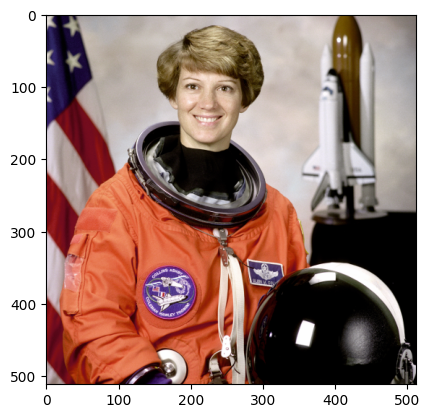

In [56]:
img = data.astronaut()
plt.imshow(img)
print(img.shape)

# Questão 1
<p>Realizar as seguintes transformações geoméricas:
  <ul>
  <li>Rotaçao de 23 graus. A imagem resultante deve incluir a imagem completa</li>
  <li>Reescalar a imagem para a metade</li>
  <li>Trasladar em 50 pixels en linhas e 100 pixels em colunas. Usar a combinação das funções <i>AffineTransform</i> e <i>warp</i></li>
  <li>Aplicar o efeito de cisalhamento (shear) em $\frac{\pi}{4}$ graus</li>
  </ul>
</p>

In [57]:
rotacao = transform.rotate(img, 23, resize=True) # Rotação de 23 graus

escala = transform.rescale(img, 0.5, channel_axis=-1) # Reescalar a imagem para metade do tamanho original

matriz_traslacao = AffineTransform(translation=(100, 50)) # Matriz de translação
traslacao = warp(img, matriz_traslacao.inverse)

matriz_shear = AffineTransform(shear=np.pi/4) # Matriz de cisalhamento (shear) de π/4
shear = warp(img, matriz_shear.inverse)

Text(0.5, 1.0, 'Shear')

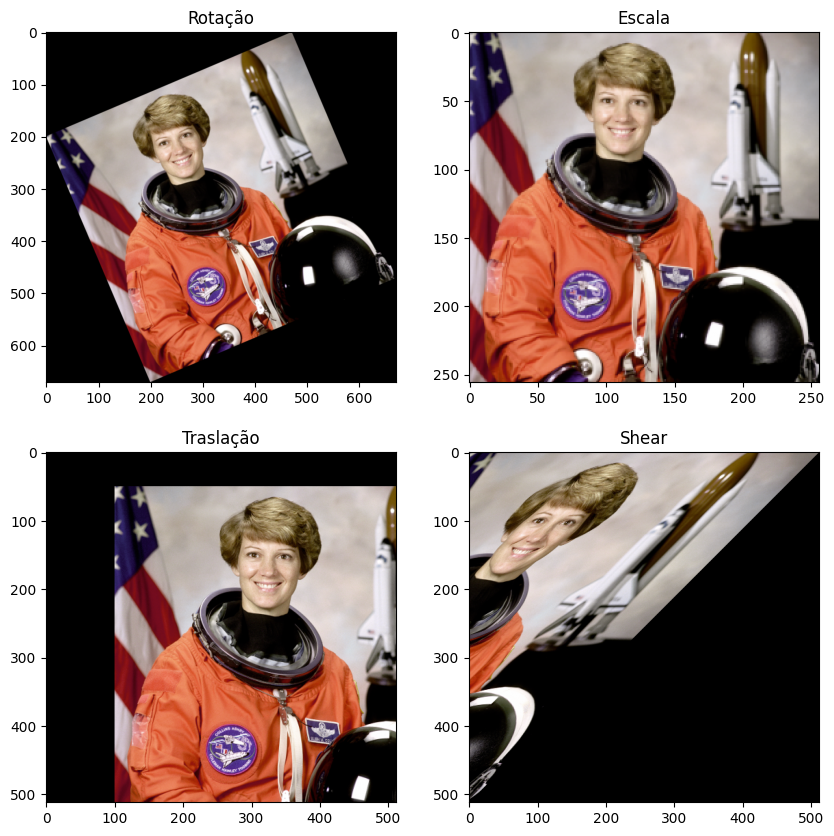

In [58]:
f, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(rotacao)
ax[0,0].set_title('Rotação')
ax[0,1].imshow(escala)
ax[0,1].set_title('Escala')
ax[1,0].imshow(traslacao)
ax[1,0].set_title('Traslação')
ax[1,1].imshow(shear)
ax[1,1].set_title('Shear')

# Questão 2

Dadas duas imagens, misturar ambas imagens gerando uma terceira. A forma de misturar é a seguinte: a terceira imagem estará formada pelas linhas impares da primeira imagem e as pares da segunda imagem.

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1FboaUm6DeM-HsHRXQfyt1tPgl6rLkGQK" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>





In [59]:
def merge(img1, img2):
    # Garantir que ambas as imagens tenham o mesmo tamanho
    min_rows = min(img1.shape[0], img2.shape[0])
    min_cols = min(img1.shape[1], img2.shape[1])

    img1 = transform.resize(img1, (min_rows, min_cols), anti_aliasing=True)
    img2 = transform.resize(img2, (min_rows, min_cols), anti_aliasing=True)

    # Converter para uint8 e garantir que tenha a mesma forma
    img1 = util.img_as_ubyte(img1).astype(np.uint8)
    img2 = util.img_as_ubyte(img2).astype(np.uint8)

    # Garantir que os tamanhos estão 100% iguais após o processamento
    img1 = img1[:min_rows, :min_cols]
    img2 = img2[:min_rows, :min_cols]

    # Criar imagem de saída
    nimg = np.zeros_like(img1)

    # Misturar
    nimg[::2, :] = img2[::2, :]  # Linhas pares da segunda imagem
    nimg[1::2, :] = img1[1::2, :]  # Linhas ímpares da primeira imagem

    return nimg

lenna = io.imread('https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_')
clown = io.imread('https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s')

print(f'Tamanho imagem Lenna: {lenna.shape}')
print(f'Tamanho imagem Clown: {clown.shape}')

if clown.shape[-1] == 4:
    clown = color.rgba2rgb(clown)
    clown = util.img_as_ubyte(clown)  # Converte para uint8

# Gerar imagem mesclada horizontalmente
merged = merge(lenna, clown)

Tamanho imagem Lenna: (512, 512, 3)
Tamanho imagem Clown: (512, 512, 4)


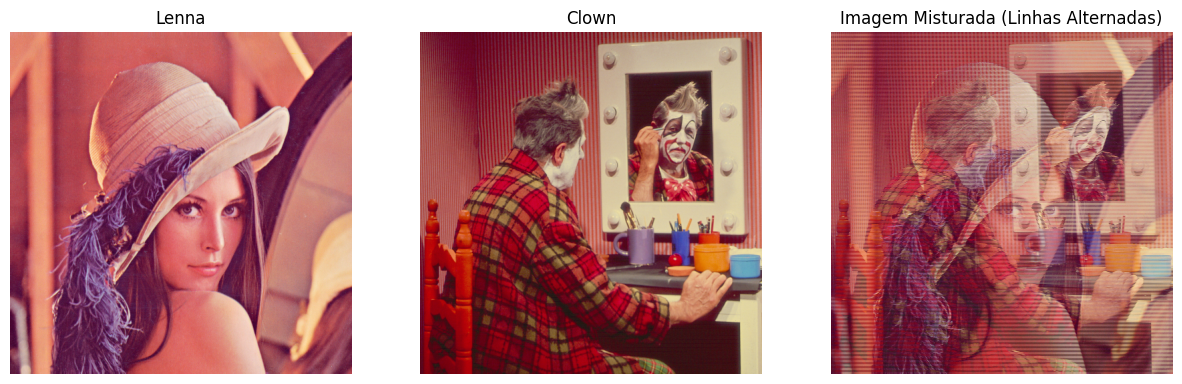

In [60]:
# Exibir imagens
f, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(lenna)
ax[0].set_title('Lenna')
ax[1].imshow(clown)
ax[1].set_title('Clown')
ax[2].imshow(merged)
ax[2].set_title('Imagem Misturada (Linhas Alternadas)')

for a in ax:
    a.axis('off')

plt.show()

# Questão 3

<p> Na seguinte imagem o valor das intensidades dos niveis de cinza estão concentrados na escala intermediaria. Verique isso calculando o histograma da imagem. Logo, corrija esse problema a través do algoritmo <i>contrast-stretching()</i>. </p>


<center>
<img src="https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb" alt="Drawing" style="width: 250px;"/>
</center>


<p>
Realizar os seguinte passos:
<ol>
<li> Calcular o histograma da imagem</li>
<li> Implementar a função <i>constrast-stretching</i>.  Ela é definida da seguinte forma: $$s = T(r) = \frac{1}{1 + (m/r)^E}$$ onde $r$ denota a intensidade da imagem, $m$ é um valor dentro do intervalo [0,1] e $E$ um valor positivo. A intensidade $r$ da imagem deve estar normalizada entre [0,1]</li>
</ol>

<center>
<img src="https://drive.google.com/uc?id=1hPgC1WDTmuU8A2E6AeEXPmanf_vW81_a" alt="Drawing" width="230" />
</center>


</p>

(300, 300, 3)


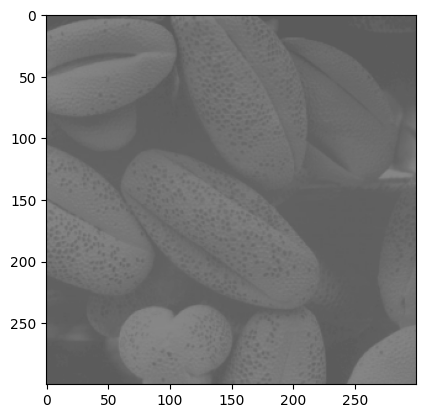

In [61]:
img2 = io.imread("https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb")
print(img2.shape)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

### Calcular os histogramas

In [62]:
img_norm = util.img_as_float(img2)

img_uint8 = util.img_as_ubyte(img_norm)

# Calcular histograma original (escala 0-255)
hist_min, hist_max, num_bins = 0, 255, 256
hist = ndimage.histogram(img_uint8, min=hist_min, max=hist_max, bins=num_bins)
bin_edges = np.arange(256)  # Correção no eixo x do histograma

# Função de contraste stretching
def contrast_stretching(img, m=0.5, E=5):
    return 1 / (1 + (m / (img + 1e-6)) ** E)  # Pequeno valor evita divisão por zero

img_stretched = contrast_stretching(img_norm) # Aplicar a transformação de contraste
img_stretched_uint8 = util.img_as_ubyte(img_stretched) # Converter para uint8 novamente para o histograma

hist_stretched = ndimage.histogram(img_stretched_uint8, min=hist_min, max=hist_max, bins=num_bins) # Calcular histograma da imagem processada

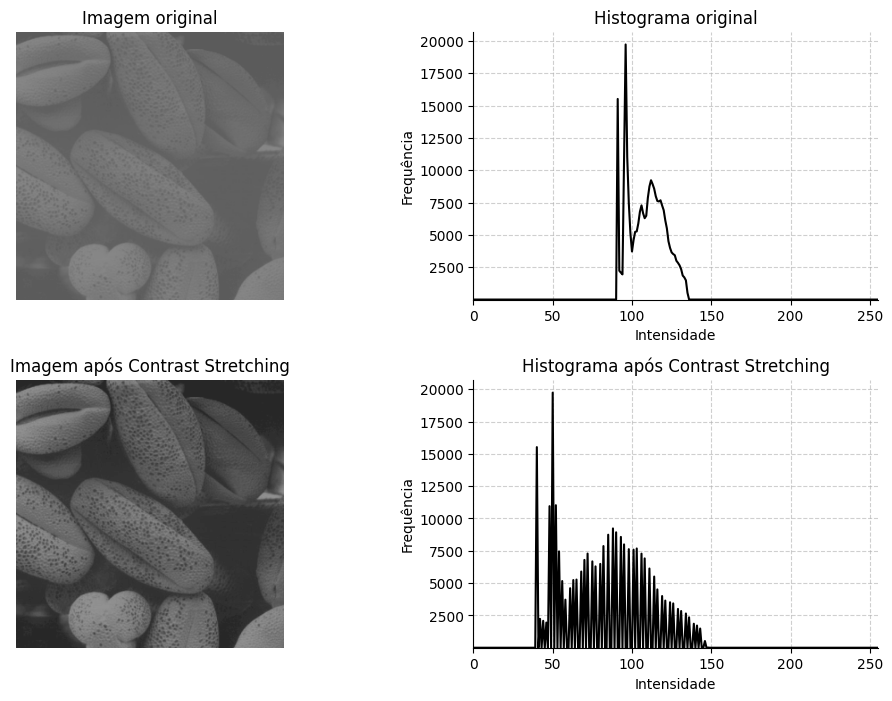

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
ax[0, 0].imshow(img2, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title("Imagem original")
ax[0, 0].axis("off")
ax[0, 1].plot(bin_edges, hist, color='black')
ax[0, 1].set_title("Histograma original")
ax[0, 1].set_xlabel("Intensidade")
ax[0, 1].set_ylabel("Frequência")
ax[0, 1].set_ylim(0.5)
ax[0, 1].set_xlim([0, 255])
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].grid(True, linestyle='--', alpha=0.6)
ax[1, 0].imshow(img_stretched, cmap='gray', vmin=0, vmax=1)
ax[1, 0].set_title("Imagem após Contrast Stretching")
ax[1, 0].axis("off")
ax[1, 1].plot(bin_edges, hist_stretched, color='black')
ax[1, 1].set_title("Histograma após Contrast Stretching")
ax[1, 1].set_xlabel("Intensidade")
ax[1, 1].set_ylabel("Frequência")
ax[1, 1].set_xlim([0, 255])
ax[1, 1].set_ylim(0.5)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.show()

### Realizar o mesmo processo com as duas seguintes imagens

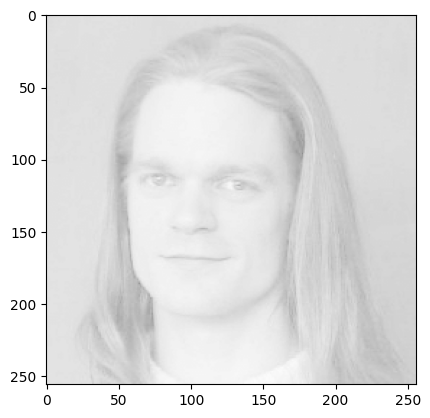

In [64]:
nimg10 = io.imread('https://drive.google.com/uc?id=15tblJ6rU1GvCcTT60eN8jxOV81km2Okr')
plt.imshow(nimg10)

#### Calcular o histograma

In [65]:
img_norm = util.img_as_float(nimg10)

img_uint8 = util.img_as_ubyte(img_norm)

# Calcular histograma original (escala 0-255)
hist_min, hist_max, num_bins = 0, 255, 256
hist = ndimage.histogram(img_uint8, min=hist_min, max=hist_max, bins=num_bins)
bin_edges = np.arange(256)  # Correção no eixo x do histograma

# Função de contraste stretching
def contrast_stretching(img, m=0.8, E=5):
    return 1 / (1 + (m / (img + 1e-6)) ** E)  # Pequeno valor evita divisão por zero

img_stretched = contrast_stretching(img_norm) # Aplicar a transformação de contraste
img_stretched_uint8 = util.img_as_ubyte(img_stretched) # Converter para uint8 novamente para o histograma

hist_stretched = ndimage.histogram(img_stretched_uint8, min=hist_min, max=hist_max, bins=num_bins) # Calcular histograma da imagem processada

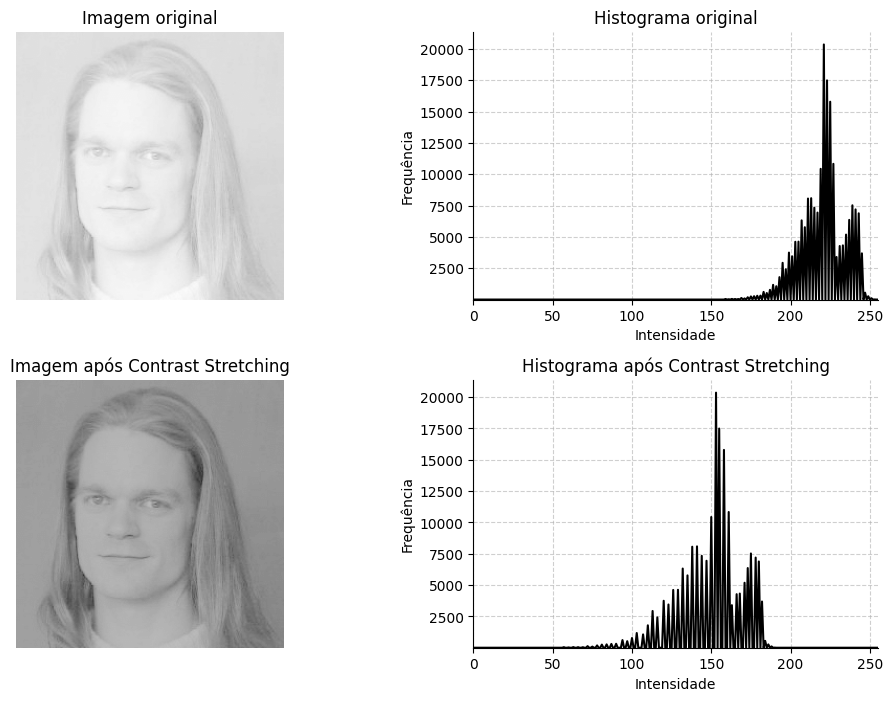

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
ax[0, 0].imshow(nimg10, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title("Imagem original")
ax[0, 0].axis("off")
ax[0, 1].plot(bin_edges, hist, color='black')
ax[0, 1].set_title("Histograma original")
ax[0, 1].set_xlabel("Intensidade")
ax[0, 1].set_ylabel("Frequência")
ax[0, 1].set_ylim(0.5)
ax[0, 1].set_xlim([0, 255])
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].grid(True, linestyle='--', alpha=0.6)
ax[1, 0].imshow(img_stretched, cmap='gray', vmin=0, vmax=1)
ax[1, 0].set_title("Imagem após Contrast Stretching")
ax[1, 0].axis("off")
ax[1, 1].plot(bin_edges, hist_stretched, color='black')
ax[1, 1].set_title("Histograma após Contrast Stretching")
ax[1, 1].set_xlabel("Intensidade")
ax[1, 1].set_ylabel("Frequência")
ax[1, 1].set_xlim([0, 255])
ax[1, 1].set_ylim(0.5)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.show()

(684, 1024, 3)


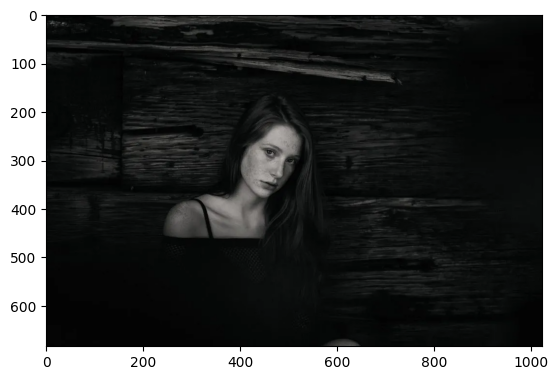

In [67]:
nimg10 = io.imread('https://drive.google.com/uc?id=1-th5aYMyQUYmAXtVjUGdohzOJlhx2Oy-')
print(nimg10.shape)
plt.imshow(nimg10)

#### Calcular os histogramas

In [68]:
img_norm = util.img_as_float(nimg10) # Converter para escala de cinza entre 0-1

img_uint8 = util.img_as_ubyte(img_norm) # Converter para uint8 (0-255) para histograma correto

# Calcular histograma original (escala 0-255)
hist_min, hist_max, num_bins = 0, 255, 256
hist = ndimage.histogram(img_uint8, min=hist_min, max=hist_max, bins=num_bins)
bin_edges = np.arange(256)  # Correção no eixo x do histograma

# Função de contraste stretching
def contrast_stretching(img, m=0.25, E=1):
    return 1 / (1 + (m / (img + 1e-6)) ** E)  # Pequeno valor evita divisão por zero

img_stretched = contrast_stretching(img_norm) # Aplicar a transformação de contraste
img_stretched_uint8 = util.img_as_ubyte(img_stretched) # Converter para uint8 novamente para o histograma

hist_stretched = ndimage.histogram(img_stretched_uint8, min=hist_min, max=hist_max, bins=num_bins) # Calcular histograma da imagem processada

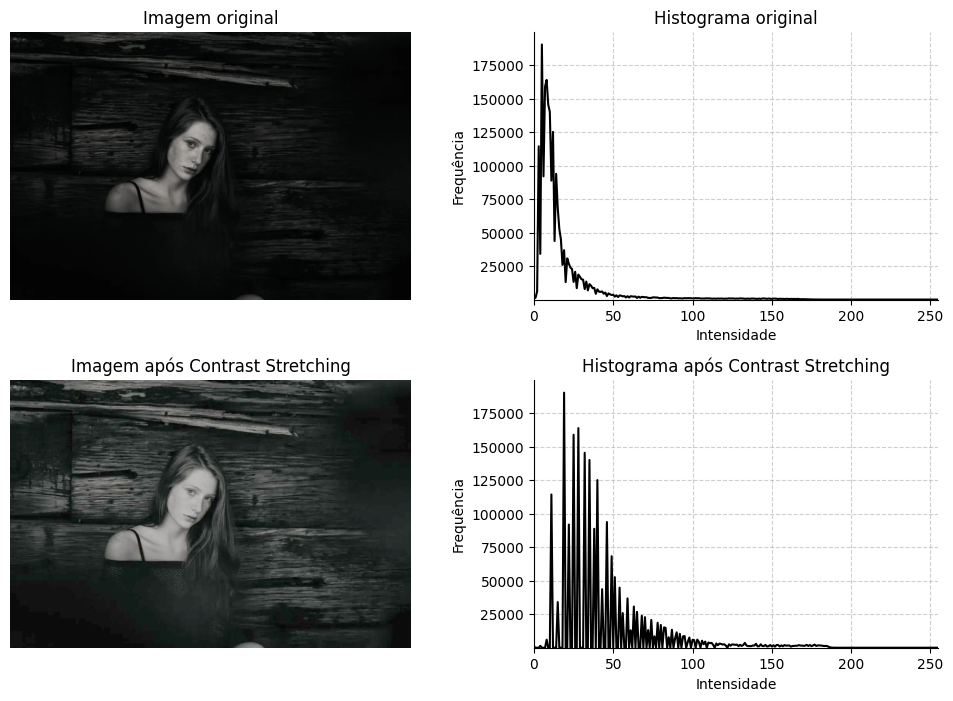

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
ax[0, 0].imshow(nimg10, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title("Imagem original")
ax[0, 0].axis("off")
ax[0, 1].plot(bin_edges, hist, color='black')
ax[0, 1].set_title("Histograma original")
ax[0, 1].set_xlabel("Intensidade")
ax[0, 1].set_ylabel("Frequência")
ax[0, 1].set_ylim(0.5)
ax[0, 1].set_xlim([0, 255])
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].grid(True, linestyle='--', alpha=0.6)
ax[1, 0].imshow(img_stretched, cmap='gray', vmin=0, vmax=1)
ax[1, 0].set_title("Imagem após Contrast Stretching")
ax[1, 0].axis("off")
ax[1, 1].plot(bin_edges, hist_stretched, color='black')
ax[1, 1].set_title("Histograma após Contrast Stretching")
ax[1, 1].set_xlabel("Intensidade")
ax[1, 1].set_ylabel("Frequência")
ax[1, 1].set_xlim([0, 255])
ax[1, 1].set_ylim(0.5)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.show()

# Questão 4

A tranformação Wave é definida como:
    \begin{eqnarray}
    nx(x,y) &=& x + 20 sin (2*\pi * y / 150) \nonumber  \\
    ny(x,y) &=& y \nonumber
    \end{eqnarray}
onde $x$ e $y$ representam as coordenadas atuais da imagem, e $nx$ e $ny$ são as novas coordenas depois da transformação.

O efeito gerado com a função é o seguinte:
<center>
<img src="https://drive.google.com/uc?id=1xXN1wY_Zdj6w8BIkF2PIU1Z99RI5OwDf" alt="Drawing" width="230" />
</center>


In [70]:
def wave(xy):
    xy[:, 1] += 20*np.sin(2*np.pi*xy[:, 0]/150)
    return xy

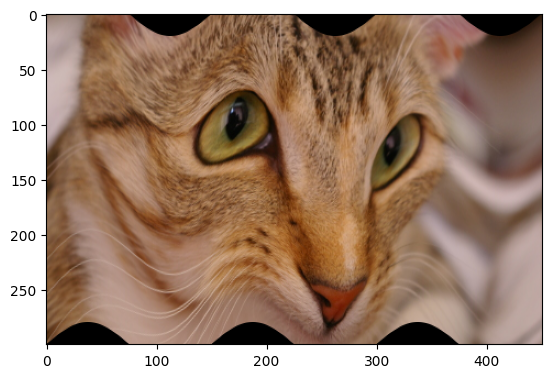

In [71]:
im = data.chelsea()
nimg = transform.warp(im, wave)
plt.imshow(nimg)

### Modifique o código para gerar o seguinte efeito:

<center>
<img src="https://drive.google.com/uc?id=1peV9ks80_w3mI5fDjD6h7uPqEINzxA0a" alt="Drawing" width="300" />
</center>

In [72]:
def wave2(xy):
    xy[:, 0] += 20 * np.sin(2 * np.pi * xy[:, 1] / 150)  # Onda horizontal
    xy[:, 1] += 20 * np.sin(2 * np.pi * xy[:, 0] / 150)  # Onda vertical
    return xy

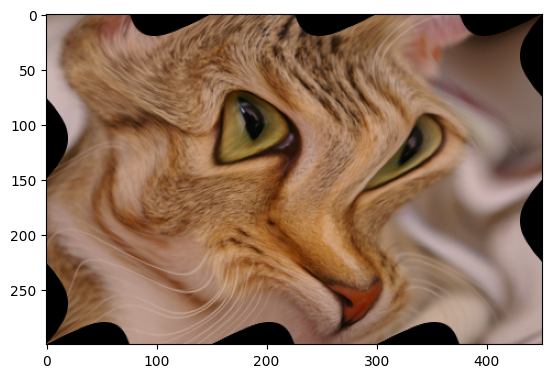

In [73]:
nimg = transform.warp(im, wave2)
plt.imshow(nimg)

# Questão 4

<p>Calcular e exibir o histograma de uma imagem em tons de cinza (8 bits por pixel). Caso a
imagem informada como entrada seja colorida, converta-a para tons de cinza (luminância) e
então calcule seu histograma. Exiba o histograma em uma janela de $256 \times 256$ pixels, onde cada
coluna da imagem representa um tom de cinza. Normalize a altura das colunas para obter uma
representação apropriada.</p>

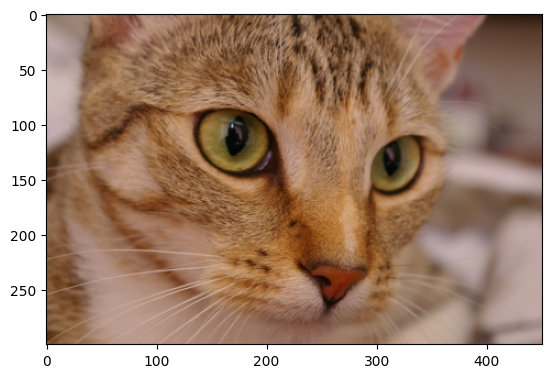

In [74]:
img2 = data.chelsea()
plt.imshow(img2)

In [75]:
# Converter para float [0, 1] e depois para uint8 [0, 255]
img_norm = util.img_as_float(img2)
img_uint8 = util.img_as_ubyte(img_norm)

# Calcular histograma da imagem uint8
hist_min, hist_max, num_bins = 0, 255, 256
hist = ndimage.histogram(img_uint8, min=hist_min, max=hist_max, bins=num_bins)
bin_edges = np.arange(256)

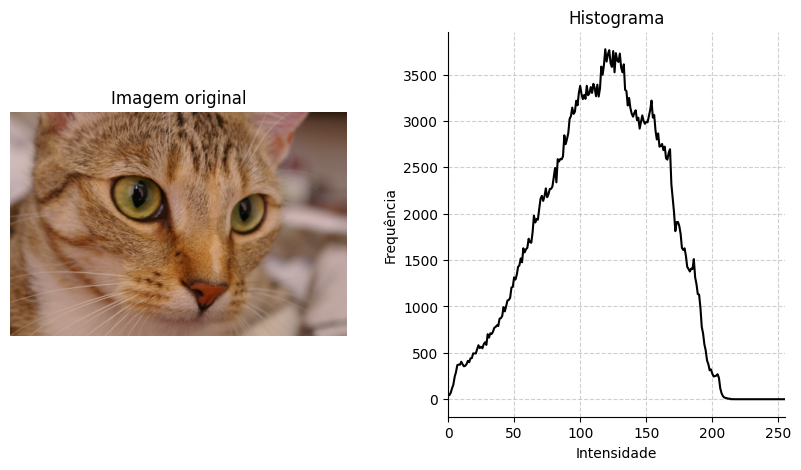

In [76]:
# Criar subplots para imagem e histograma
fig, ax = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.3})

# Exibir imagem
ax[0].imshow(img_uint8)
ax[0].set_title("Imagem original")
ax[0].axis("off")

# Exibir histograma
ax[1].plot(bin_edges, hist, color='black')
ax[1].set_title("Histograma")
ax[1].set_xlabel("Intensidade")
ax[1].set_ylabel("Frequência")
ax[1].set_xlim([0, 255])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.show()

# Questão 5
<p>Implemente uma função que realize a rotação de uma imagem facial juntamente com seus respectivos landmarks. A imagem está associada a um conjunto de coordenadas que representam pontos-chave das principais partes da face. A rotação deve ser aplicada de forma consistente tanto à imagem quanto aos landmarks, preservando sua correspondência espacial.</p>

#### Função para plotar os landmarks na imagem

In [77]:
def insertLandmark_in_2D_image(img, landmarks, value = 255, viz = 1, rotate=False):
    lin, col = img.shape[:2]

    if not rotate:
      for i in range( len(landmarks) ):
          iniR = landmarks[i,0] - viz
          endR = landmarks[i,0] + viz
          iniC = landmarks[i,1] - viz
          endC = landmarks[i,1] + viz
          if iniR >= 0 and endR < lin and iniC >= 0 and endC < col:
              img[ iniR:endR, iniC:endC ] = value
      return img

    else:
      for i in range(len(landmarks)):
          # Atenção: (x, y) → (coluna, linha)
          iniR = int(landmarks[i, 1] - viz)
          endR = int(landmarks[i, 1] + viz)
          iniC = int(landmarks[i, 0] - viz)
          endC = int(landmarks[i, 0] + viz)

          # Garante que os índices estejam dentro da imagem
          if iniR >= 0 and endR < lin and iniC >= 0 and endC < col:
              img[iniR:endR, iniC:endC] = value
      return img

def insertLandmark_in_3D_image(img, landmarks, channel = 0, viz = 1, rotate=False):
    nimg = img.copy()
    value = 1 if np.max(img) <= 1 else 255
    lin, col = nimg.shape[:2]

    if channel == 0:
        nimg[:,:,0] = insertLandmark_in_2D_image(nimg[:,:,0], landmarks, value, viz, rotate)
        nimg[:,:,1] = insertLandmark_in_2D_image(nimg[:,:,1], landmarks, 0, viz, rotate)
        nimg[:,:,2] = insertLandmark_in_2D_image(nimg[:,:,2], landmarks, 0, viz, rotate)
    elif channel == 1:
        nimg[:,:,0] = insertLandmark_in_2D_image(nimg[:,:,0], landmarks, 0, viz, rotate)
        nimg[:,:,1] = insertLandmark_in_2D_image(nimg[:,:,1], landmarks, value, viz, rotate)
        nimg[:,:,2] = insertLandmark_in_2D_image(nimg[:,:,2], landmarks, 0, viz, rotate)
    elif channel == 2:
        nimg[:,:,0] = insertLandmark_in_2D_image(nimg[:,:,0], landmarks, 0, viz, rotate)
        nimg[:,:,1] = insertLandmark_in_2D_image(nimg[:,:,1], landmarks, 0, viz, rotate)
        nimg[:,:,2] = insertLandmark_in_2D_image(nimg[:,:,2], landmarks, value, viz, rotate)
    return nimg

### Carrega a imagem e seus respectivos landmarks

In [78]:
img = io.imread('https://drive.google.com/uc?id=15iM3Ds3oDwZ7w4iRggx5tbEM_HVayobR')

file_id = "1YFj703yFOwIIH5jnRU1Ix7FNu2NxKHc_" # replace with your ID
!gdown https://drive.google.com/uc?id={file_id}
landmarks = np.loadtxt('indoor_006.txt', delimiter=';').astype(np.float64)
landmarks

Downloading...
From: https://drive.google.com/uc?id=1YFj703yFOwIIH5jnRU1Ix7FNu2NxKHc_
To: /content/indoor_006.txt
100% 1.15k/1.15k [00:00<00:00, 3.35MB/s]


array([[296.131, 146.934],
       [295.032, 236.332],
       [309.498, 321.64 ],
       [328.214, 407.71 ],
       [358.269, 476.722],
       [404.02 , 536.29 ],
       [461.747, 589.104],
       [519.166, 634.548],
       [611.274, 650.141],
       [701.738, 622.407],
       [750.332, 573.52 ],
       [803.226, 515.566],
       [843.464, 454.353],
       [868.713, 389.276],
       [873.873, 298.669],
       [881.202, 206.178],
       [869.817, 132.004],
       [350.181, 139.526],
       [392.012, 124.098],
       [439.683, 119.394],
       [487.552, 116.147],
       [534.602, 137.054],
       [641.961, 128.961],
       [680.576, 111.676],
       [731.093, 106.   ],
       [778.843, 108.762],
       [832.904, 109.345],
       [588.285, 203.583],
       [587.86 , 252.935],
       [587.663, 303.691],
       [589.262, 348.983],
       [536.82 , 367.416],
       [565.009, 378.699],
       [594.872, 386.369],
       [620.355, 374.972],
       [649.507, 373.453],
       [395.181, 176.853],
 

### Plotando a imagem junto com os landmarks

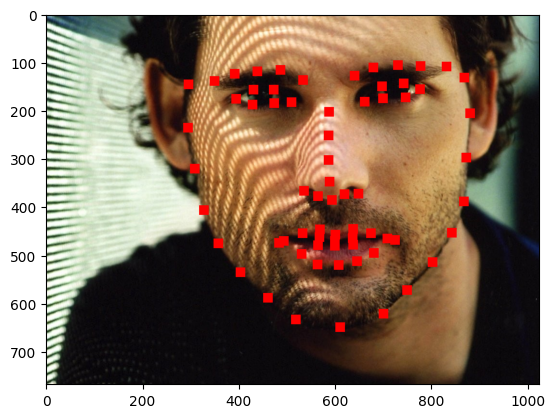

In [79]:
plt.imshow(insertLandmark_in_3D_image(img, landmarks[:,-1::-1].astype(np.int64), channel = 0, viz = 10))
plt.show()

In [80]:
def rotate_image_and_landmarks(image, landmarks, angle, center=None):
    rotated_img = transform.rotate(image, angle=angle, resize=False, preserve_range=True).astype(image.dtype)

    # Centro da imagem se não for especificado
    if center is None:
        center = np.array([image.shape[1] / 2, image.shape[0] / 2])  # (x, y)

    # Matriz de rotação
    theta = np.deg2rad(-angle)  # sinal invertido para coincidir com o comportamento do skimage.rotate
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

    # Centraliza os landmarks, aplica rotação, e volta ao sistema original
    landmarks_centered = landmarks - center
    rotated_landmarks = landmarks_centered @ rotation_matrix.T + center

    return rotated_img, rotated_landmarks

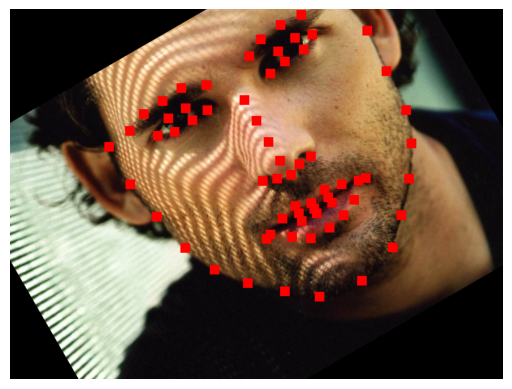

In [81]:
rotated_img, rotated_landmarks = rotate_image_and_landmarks(img, landmarks, angle=30)

img_with_landmarks = insertLandmark_in_3D_image(rotated_img, rotated_landmarks, channel=0, viz=10, rotate=True)

plt.imshow(img_with_landmarks.astype(np.uint8))
plt.axis('off')
plt.show()